
# Mechanical oscillator model (multioutput)

In this example, we consider the mechanical oscillator is governed by the following 
second-order ODE as demonstrated in [1]_:

\begin{align}m \ddot{x} + c \dot{x} + k x = 0\end{align}

\begin{align}x(0) = \ell, \dot{x}(0) = 0.\end{align}

The parameteres of the oscillator are modeled as follows:

\begin{align}m \sim \mathcal{U}(10, 12), c \sim \mathcal{U}(0.4, 0.8), k \sim \mathcal{U}(70, 90), \ell \sim \mathcal{U}(-1, -0.25).\end{align}

Here, we compute the Sobol indices for each point in time and are called 
pointwise-in-time Sobol indices. These indices describe the sensitivity of the model 
parameters at each point in time.

.. [1] Gamboa, F., Janon, A., Klein, T., & Lagnoux, A. (2014). Sensitivity analysis for multidimensional and functional outputs. Electronic Journal of Statistics, 8(1), 575-603.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from UQpy.run_model.RunModel import RunModel
from UQpy.run_model.model_execution.PythonModel import PythonModel
from UQpy.distributions import Uniform
from UQpy.distributions.collection.JointIndependent import JointIndependent
from UQpy.sensitivity.SobolSensitivity import SobolSensitivity

**Define the model and input distributions**



In [2]:
# Create Model object
model = PythonModel(
    model_script="local_mechanical_oscillator_ODE.py",
    model_object_name="mech_oscillator",
    var_names=[r"$m$", "$c$", "$k$", "$\ell$"],
    delete_files=True,
)

runmodel_obj = RunModel(model=model)

# Define distribution object
M = Uniform(10, (12 - 10))
C = Uniform(0.4, (0.8 - 0.4))
K = Uniform(70, (90 - 70))
L = Uniform(-1, (-0.25 - -1))
dist_object = JointIndependent([M, C, K, L])

**Compute Sobol indices**



In [3]:
SA = SobolSensitivity(runmodel_obj, dist_object)

SA.run(n_samples=500)

**Plot the Sobol indices**



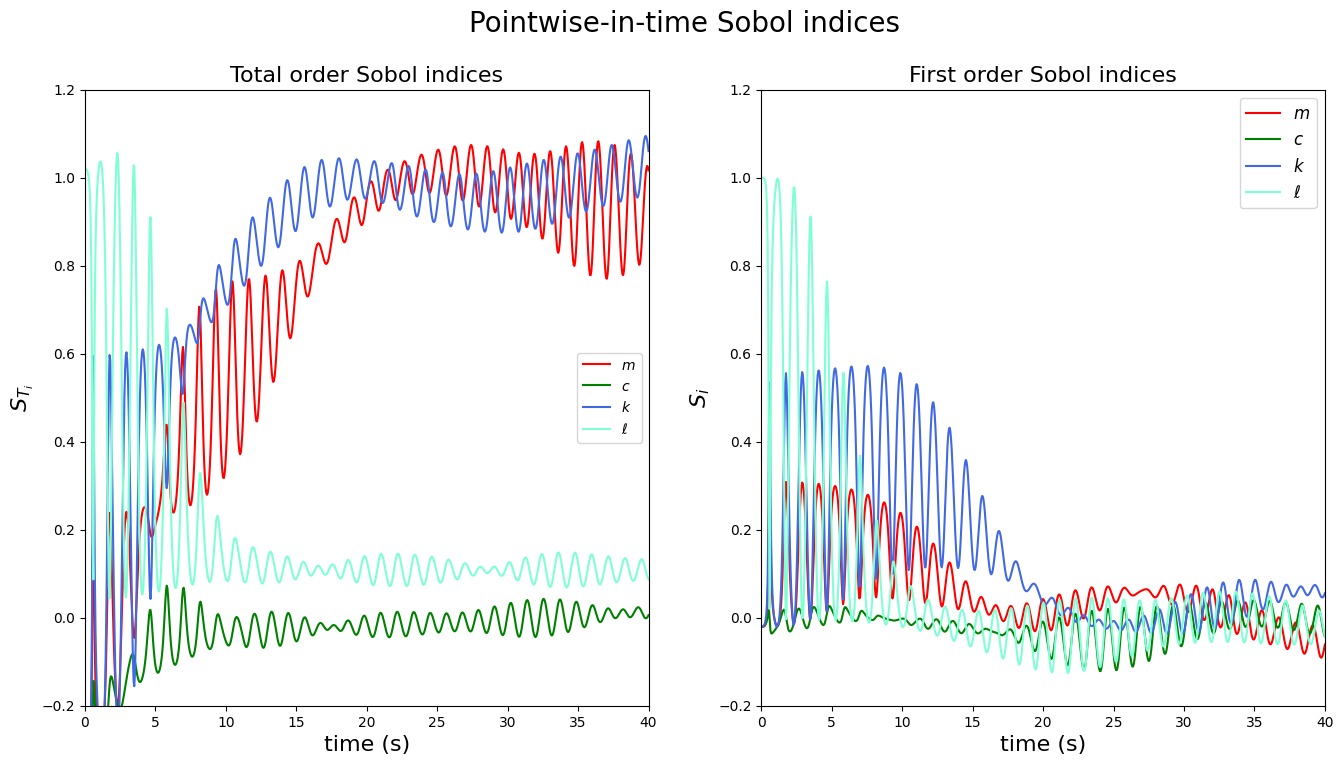

In [4]:
t_0 = 0
t_f = 40
dt = 0.05
n_t = int((t_f - t_0) / dt)
T = np.linspace(t_0, t_f, n_t)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].plot(T, SA.total_order_indices[0, :], "r", label=r"$m$")
ax[0].plot(T, SA.total_order_indices[1, :], "g", label=r"$c$")
ax[0].plot(T, SA.total_order_indices[2, :], label=r"$k$", color="royalblue")
ax[0].plot(T, SA.total_order_indices[3, :], label=r"$\ell$", color="aquamarine")

ax[0].set_title("Total order Sobol indices", fontsize=16)
ax[0].set_xlabel("time (s)", fontsize=16)
ax[0].set_ylabel(r"$S_{T_i}$", fontsize=16)
ax[0].set_xbound(0, t_f)
ax[0].set_ybound(-0.2, 1.2)
ax[0].legend()

ax[1].plot(T, SA.first_order_indices[0, :], "r", label=r"$m$")
ax[1].plot(T, SA.first_order_indices[1, :], "g", label=r"$c$")
ax[1].plot(T, SA.first_order_indices[2, :], label=r"$k$", color="royalblue")
ax[1].plot(T, SA.first_order_indices[3, :], label=r"$\ell$", color="aquamarine")

ax[1].set_title("First order Sobol indices", fontsize=16)
ax[1].set_xlabel("time (s)", fontsize=16)
ax[1].set_ylabel(r"$S_i$", fontsize=16)
ax[1].set_xbound(0, t_f)
ax[1].set_ybound(-0.2, 1.2)
ax[1].legend(fontsize=12)

fig.suptitle("Pointwise-in-time Sobol indices", fontsize=20)

plt.show()